# Downloading data

So as not to have everyone download data at once, please download some before the tutorial starts. 

PBjam includes a wrapper function which downloads the time series via Lightkurve and computes the power spectrum and normalizes everything correctly. 

All you need to to do is specify the ID(s) as KICxxxxxxxx, and pick the exposure time(s) that you want. If you're interested in a red giant you'll need to set exptime to `1800` for long cadence, or if it's a main sequence target `60` for short cadence. The mission and author keywords should both be `Kepler` 

In [1]:
from pbjam import IO

/home/ADF/nielsemb/.local/lib/python3.10/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /home/ADF/nielsemb/.lightkurve/cache. Please move all the files in the legacy directory /home/ADF/nielsemb/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [2]:
ID = 'KIC5184732'

psd = IO.psd(ID, lk_kwargs={'exptime': 60, 'mission':'Kepler', 'author':'Kepler'})
 
psd()

f = psd.freq

s = psd.powerdensity

No cached search results, searching MAST
Loading fits files from cache.


Just to check everything is in order we can plot the spectrum

Text(0, 0.5, 'Power density [ppm$^2/\\mu$Hz]')

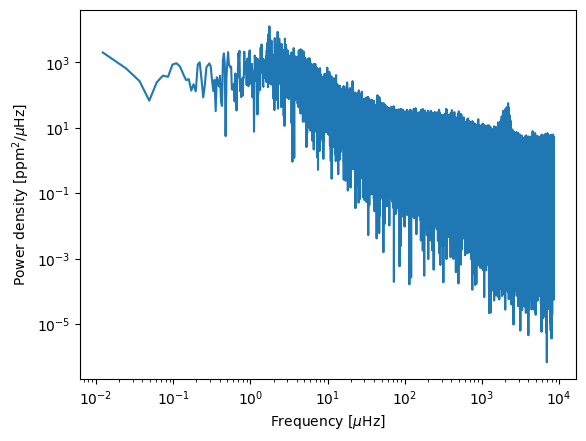

In [5]:
import matplotlib.pyplot as plt

plt.loglog(f,s)
plt.xlabel('Frequency [$\mu$Hz]')

plt.ylabel('Power density [ppm$^2/\mu$Hz]')

You can then store the power spectrum as a text file (or whatever you want).

In [6]:
import numpy as np
np.savetxt(f'{ID}.pow', np.array([f,s]).T, header = 'Frequency [muHz], powerdensity [ppm^2/muHz')